In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import os

# Define the path to the folder containing the CSV files
folder_path = "/kaggle/input/crimeanalysis1"  # Update with the correct path if different

# Check if the folder exists
if not os.path.exists(folder_path):
    print(f"Error: The directory '{folder_path}' does not exist.")
else:
    # List all files in the directory to verify
    print("Files in the directory:")
    print(os.listdir(folder_path))

    # Load all CSV files into a combined DataFrame
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
    dataframes = []

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        try:
            df = pd.read_csv(file_path, on_bad_lines='skip')
            dataframes.append(df)
        except pd.errors.ParserError as e:
            print(f"Error parsing {file}: {e}")

    if dataframes:
        # Combine all DataFrames into one
        combined_df = pd.concat(dataframes, ignore_index=True)

        # Save the combined DataFrame to a CSV file (optional)
        combined_df.to_csv('/kaggle/working/combined_dataframe.csv', index=False)

        print("Combined DataFrame:")
        print(combined_df.head())
    else:
        print("No valid CSV files found in the directory.")


Files in the directory:
['combined_dataframe.csv', '29_Period_of_trials_by_courts.csv', '28_Trial_of_violent_crimes_by_courts.csv', '20_Victims_of_rape.csv', '35_Human_rights_violation_by_police.csv', '40_04_Custodial_death_during_hospitalization_or_treatment.csv', '39_Specific_purpose_of_kidnapping_and_abduction.csv', '33_CH_not_murder_victim_age_sex.csv', '36_Police_housing.csv', '31_Serious_fraud.csv', '43_Arrests_under_crime_against_women.csv', '40_03_Custodial_death_during_production.csv', '40_05_Custodial_death_others.csv', '32_Murder_victim_age_sex.csv', '30_Auto_theft.csv', '40_01_Custodial_death_person_remanded.csv', '36_Police_housing_cleaned.csv', '40_02_Custodial_death_person_not_remanded.csv', '42_Cases_under_crime_against_women.csv', '10_Property_stolen_and_recovered.csv', '25_Complaints_against_police.csv']


/tmp/ipykernel_33/869013490.py:22: DtypeWarning: Columns (8,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, on_bad_lines='skip')


Combined DataFrame:
                   Area_Name  Year           Group_Name Sub_Group_Name  \
0  Andaman & Nicobar Islands  2001  Burglary - Property    3. Burglary   
1             Andhra Pradesh  2001  Burglary - Property    3. Burglary   
2          Arunachal Pradesh  2001  Burglary - Property    3. Burglary   
3                      Assam  2001  Burglary - Property    3. Burglary   
4                      Bihar  2001  Burglary - Property    3. Burglary   

   Cases_Property_Recovered  Cases_Property_Stolen  \
0                      27.0                   64.0   
1                    3321.0                 7134.0   
2                      66.0                  248.0   
3                     539.0                 2423.0   
4                     367.0                 3231.0   

   Value_of_Property_Recovered  Value_of_Property_Stolen Subgroup  \
0                     755858.0                 1321961.0      NaN   
1                   51483437.0               147019348.0      NaN   
2  

In [4]:
# Check for missing values
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0])

# Fill or drop missing values as appropriate
# Example: Fill numeric columns with the mean
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())

# Example: Fill categorical columns with the mode
categorical_columns = combined_df.select_dtypes(include=['object']).columns
combined_df[categorical_columns] = combined_df[categorical_columns].fillna(combined_df[categorical_columns].mode().iloc[0])

# Convert data types if necessary
# Example: Convert 'Year' to integer
combined_df['Year'] = combined_df['Year'].astype(int)

# Check for duplicates
duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates
combined_df = combined_df.drop_duplicates()


Group_Name                                                                                                  4672
Sub_Group_Name                                                                                              2800
Cases_Property_Recovered                                                                                   51546
Cases_Property_Stolen                                                                                      51546
Value_of_Property_Recovered                                                                                51546
                                                                                                           ...  
Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End                                                     50914
Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason    50914
Persons_Trial_Completed                                                                         

In [5]:
import pandas as pd
import numpy as np

# Drop duplicates
combined_df = combined_df.drop_duplicates()
print(f"Number of duplicate rows after cleaning: {combined_df.duplicated().sum()}")

# Fill missing values
# Numeric columns with their mean
numeric_columns = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_columns] = combined_df[numeric_columns].fillna(combined_df[numeric_columns].mean())

# Categorical columns with their mode
categorical_columns = combined_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    combined_df[column] = combined_df[column].fillna(combined_df[column].mode()[0])

# Verify the changes
print("Missing values after cleaning:")
print(combined_df.isnull().sum())


Number of duplicate rows after cleaning: 0
Missing values after cleaning:
Area_Name                                                                                                  0
Year                                                                                                       0
Group_Name                                                                                                 0
Sub_Group_Name                                                                                             0
Cases_Property_Recovered                                                                                   0
                                                                                                          ..
Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End                                                     0
Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason    0
Persons_Trial_Completed                               

In [6]:
potential_targets = [
    'Cases_Property_Recovered', 'Cases_Property_Stolen',
    'Value_of_Property_Recovered', 'Value_of_Property_Stolen',
    'Total_Persons_under_Trial'
]

missing_values = combined_df[potential_targets].isnull().sum()
print(missing_values)


Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
Total_Persons_under_Trial      0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


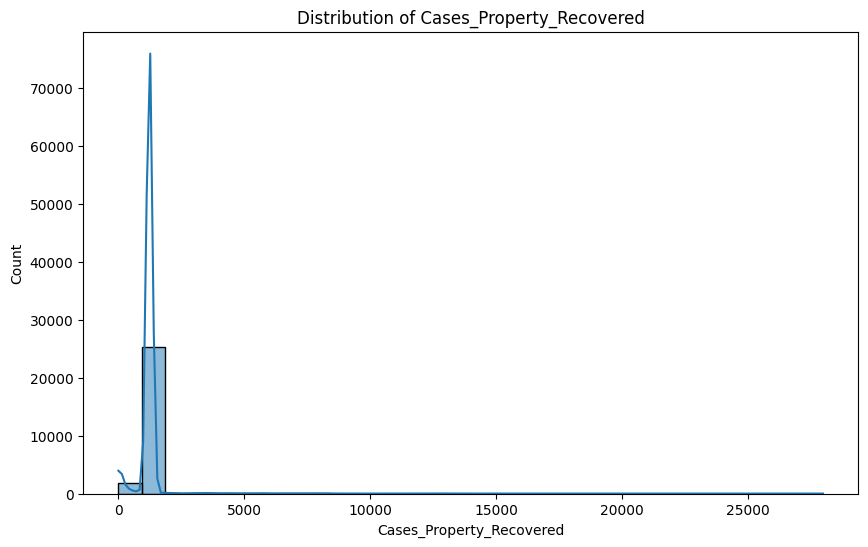

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


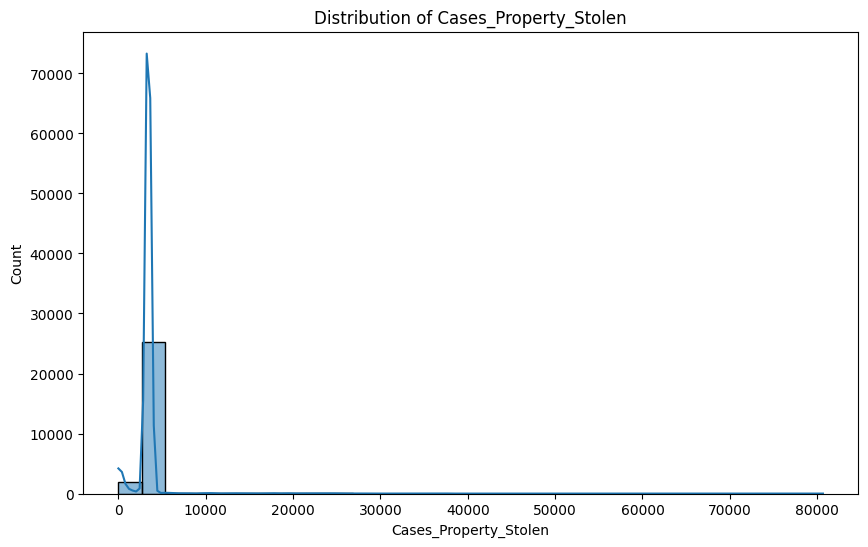

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


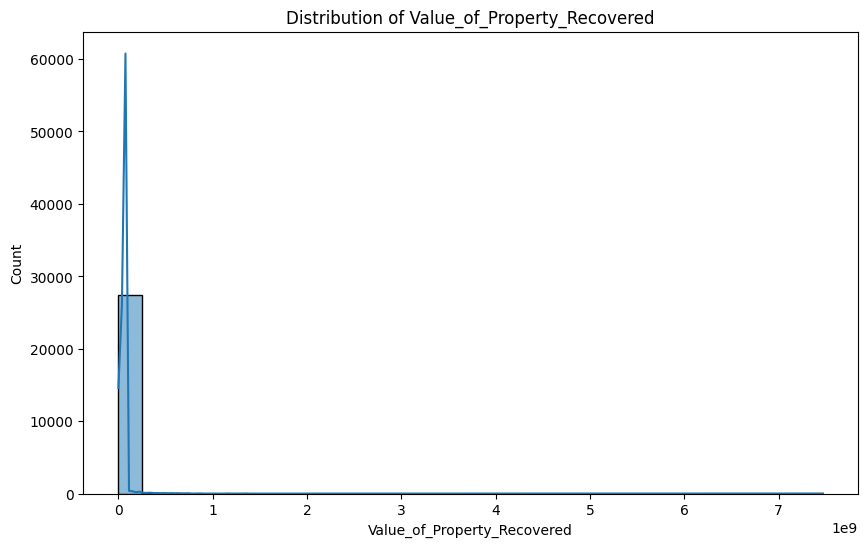

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


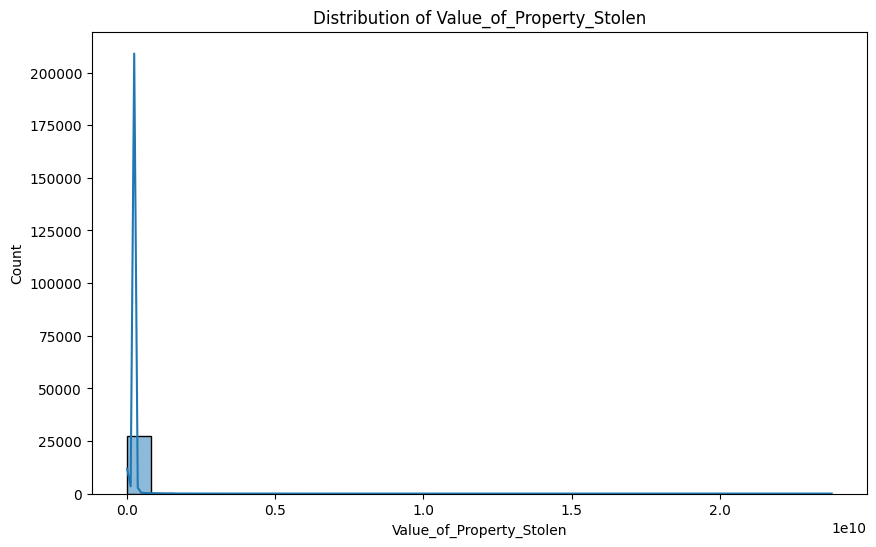

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


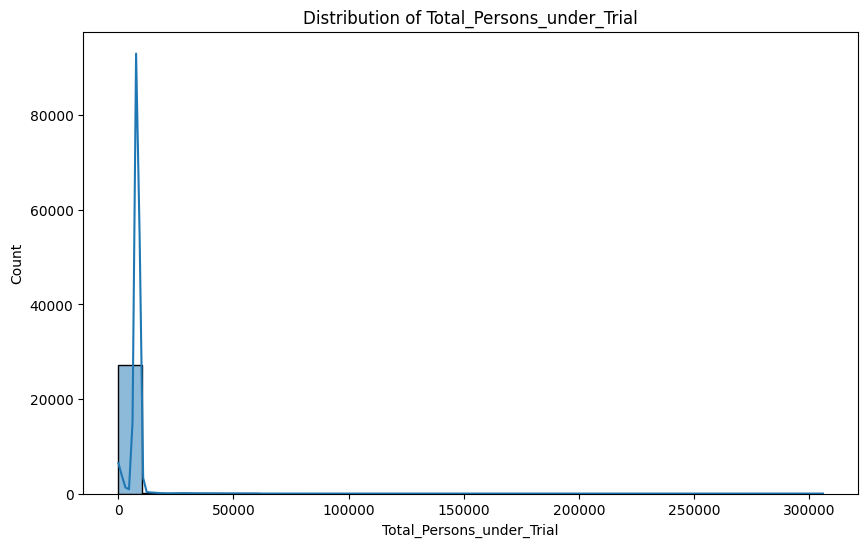

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for target in potential_targets:
    plt.figure(figsize=(10, 6))
    sns.histplot(combined_df[target], bins=30, kde=True)
    plt.title(f'Distribution of {target}')
    plt.show()


In [8]:
# Convert infinite values to NaN
combined_df.replace([np.inf, -np.inf], np.nan, inplace=True)


In [9]:
combined_df_encoded = pd.get_dummies(combined_df, drop_first=True)


In [10]:
correlation_matrix = combined_df_encoded.corr()

for target in potential_targets:
    print(f"Correlation of {target} with other features:")
    print(correlation_matrix[target].sort_values(ascending=False).head(10))
    print("\n")


Correlation of Cases_Property_Recovered with other features:
Cases_Property_Recovered                               1.000000
Cases_Property_Stolen                                  0.935765
Value_of_Property_Stolen                               0.579084
Value_of_Property_Recovered                            0.495588
Sub_Group_Name_7. Total Property Stolen & Recovered    0.381630
Group_Name_Total Property                              0.381630
Group_Name_Theft - Property                            0.195676
Sub_Group_Name_4. Theft                                0.195676
Area_Name_Maharashtra                                  0.084925
Area_Name_Tamil Nadu                                   0.058470
Name: Cases_Property_Recovered, dtype: float64


Correlation of Cases_Property_Stolen with other features:
Cases_Property_Stolen                                  1.000000
Cases_Property_Recovered                               0.935765
Value_of_Property_Stolen                               0.643448


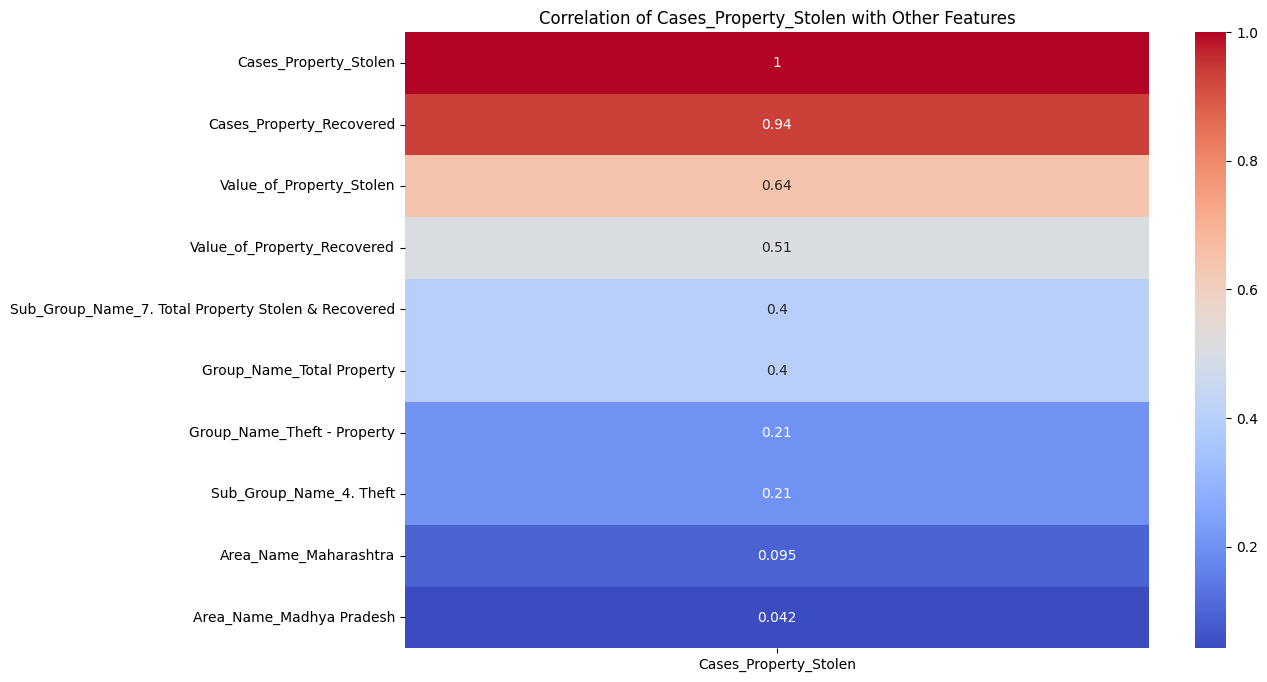

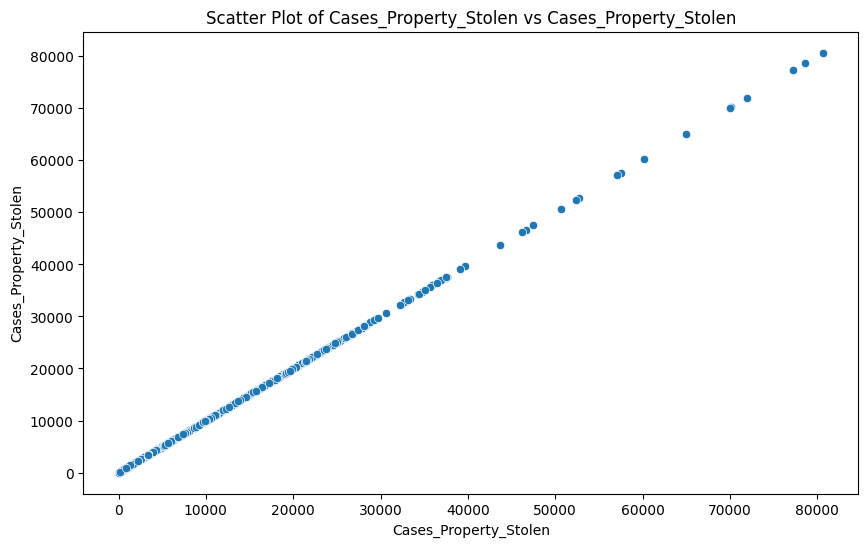

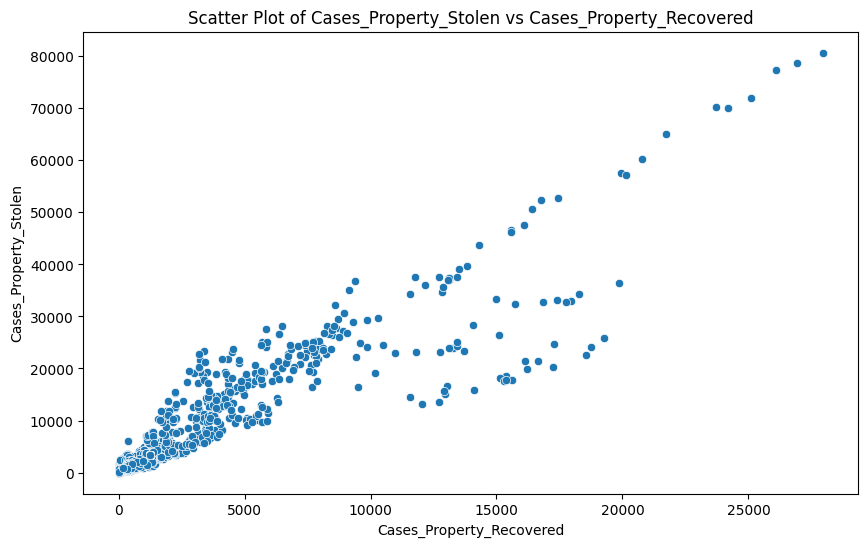

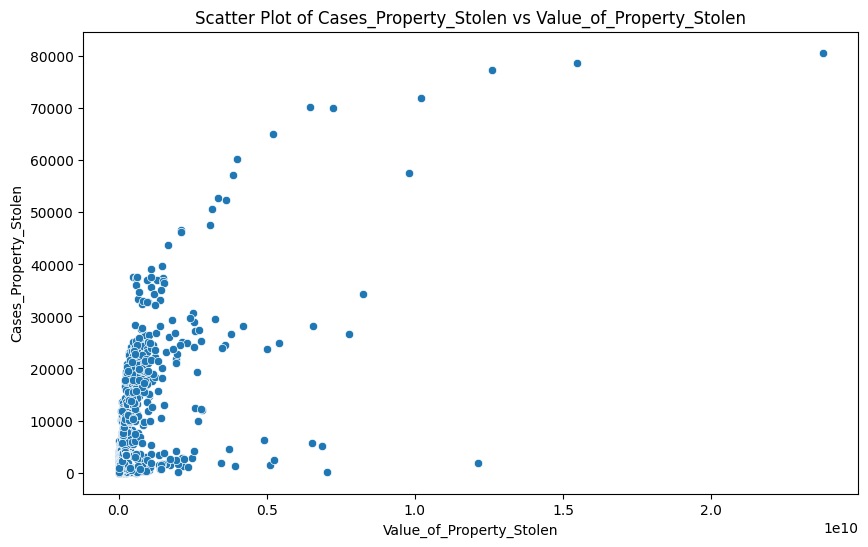

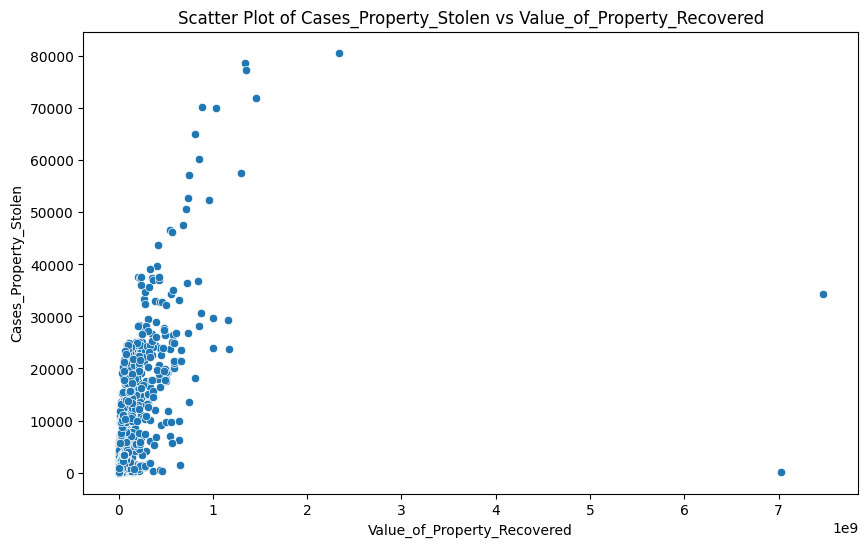

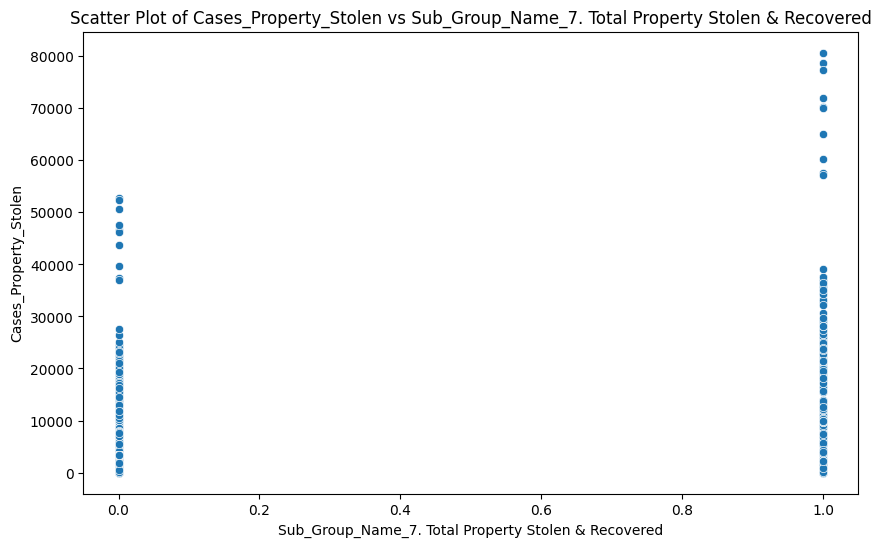

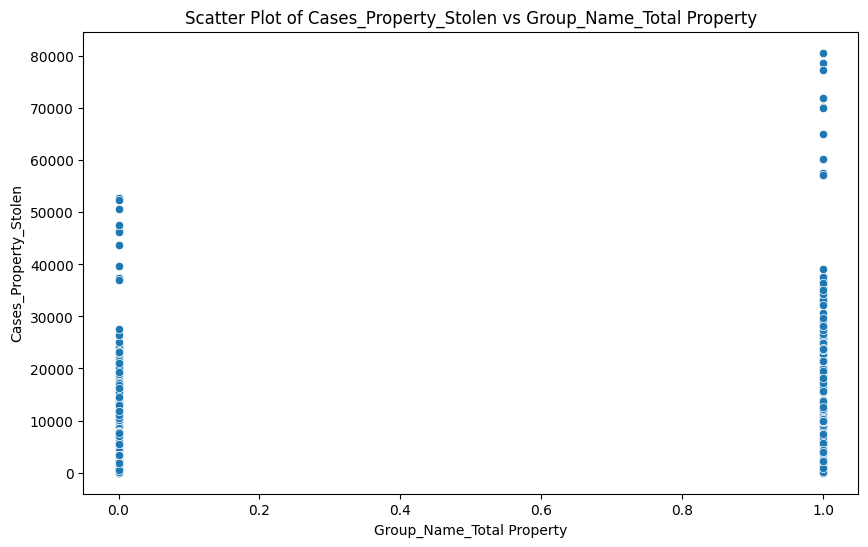

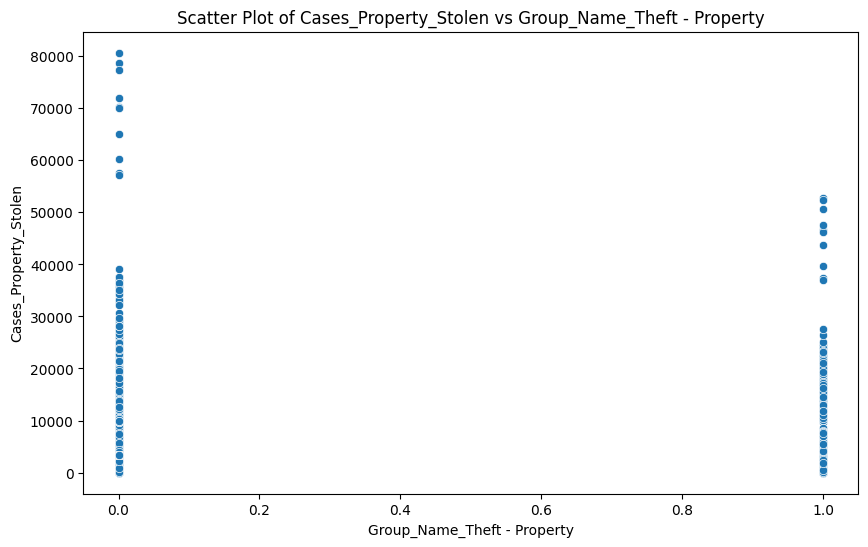

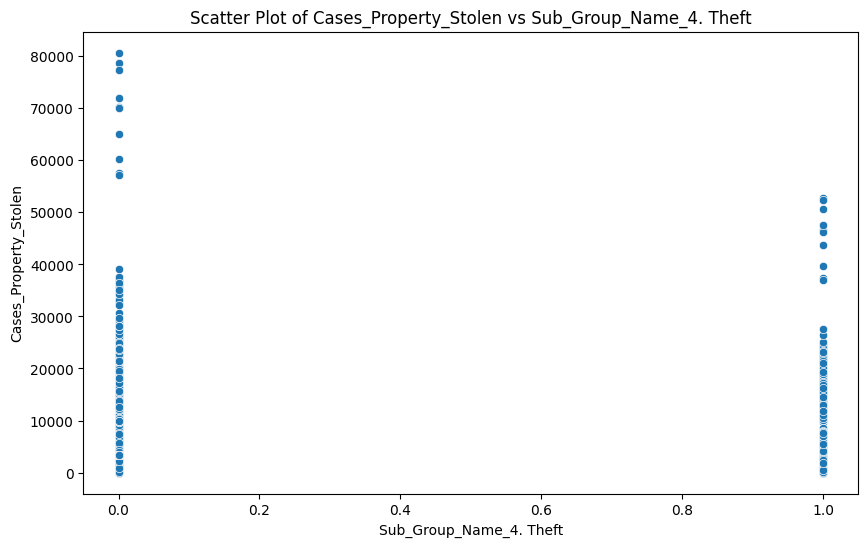

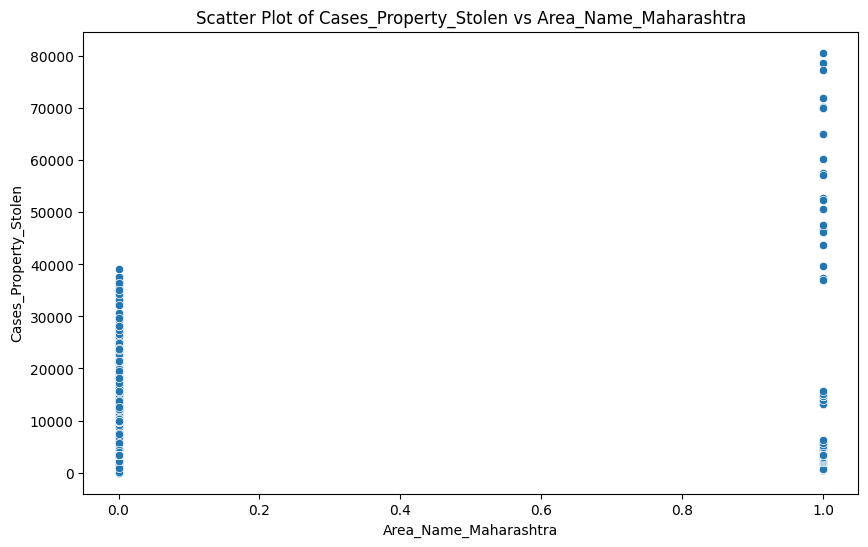

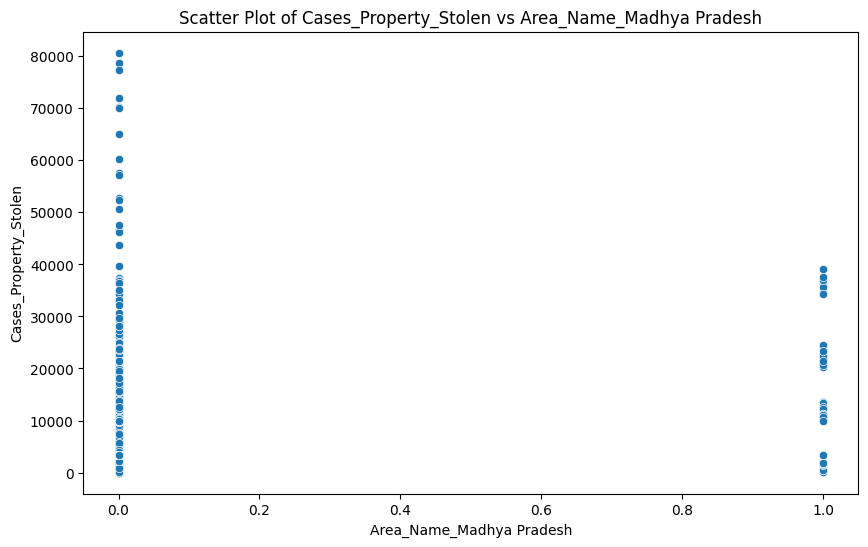

In [43]:
target = 'Cases_Property_Stolen'
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the correlation of 'Cases_Property_Stolen' with other features
plt.figure(figsize=(12, 8))
correlation_target = correlation_matrix[target]
sns.heatmap(correlation_target.sort_values(ascending=False).head(10).to_frame(), annot=True, cmap='coolwarm')
plt.title(f'Correlation of {target} with Other Features')
plt.show()

top_correlated_features = correlation_target.sort_values(ascending=False).head(10).index

for feature in top_correlated_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=combined_df_encoded, x=feature, y=target)
    plt.title(f'Scatter Plot of {target} vs {feature}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()
    


In [44]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = combined_df_encoded.drop(columns=[target])
y = combined_df_encoded[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
combined_df_encoded[target].describe()


count    27526.000000
mean      3419.420988
std       2426.423992
min          0.000000
25%       3419.420988
50%       3419.420988
75%       3419.420988
max      80663.000000
Name: Cases_Property_Stolen, dtype: float64

In [46]:
# Define bins and labels for binning
bins = [-np.inf, 0, 1000, 5000, 10000, 50000, np.inf]
labels = ['Zero', 'Very Low', 'Low', 'Medium', 'High', 'Very High']

# Bin the target variable
combined_df_encoded['Binned_Cases_Property_Stolen'] = pd.cut(combined_df_encoded['Cases_Property_Stolen'], bins=bins, labels=labels)

# Use the binned target variable for classification
target = 'Binned_Cases_Property_Stolen'

# Split the data into train and test sets
X = combined_df_encoded.drop(columns=[target])
y = combined_df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load your data
# Assuming you have a CSV file or any dataset
# df = pd.read_csv('your_dataset.csv')

# Example data
# X = df.drop('target_column', axis=1)
# y = df['target_column']

# For this example, I am going to create a dummy dataset.
# Replace this with your actual data loading process
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[0.1, 0.9], random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers with increased iterations for Logistic Regression
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'K-Neighbors': KNeighborsClassifier()
}

# Train and evaluate classifiers without scaling
accuracy_without_scaling = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_without_scaling[name] = accuracy

print("Accuracy without scaling:")
print(accuracy_without_scaling)

Accuracy without scaling:
{'Logistic Regression': 0.9266666666666666, 'Decision Tree': 0.9033333333333333, 'Random Forest': 0.9166666666666666, 'Gradient Boosting': 0.91, 'AdaBoost': 0.9, 'Naive Bayes': 0.83, 'SVM': 0.92, 'K-Neighbors': 0.9066666666666666}


In [48]:
# Apply StandardScaler to the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers with increased iterations for Logistic Regression
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=5000),  # Increased iterations
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'K-Neighbors': KNeighborsClassifier()
}

# Train and evaluate classifiers with scaling
accuracy_with_scaling = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_with_scaling[name] = accuracy

print("Accuracy with scaling:")
print(accuracy_with_scaling)


Accuracy with scaling:
{'Logistic Regression': 0.9266666666666666, 'Decision Tree': 0.9, 'Random Forest': 0.9133333333333333, 'Gradient Boosting': 0.9133333333333333, 'AdaBoost': 0.9, 'Naive Bayes': 0.83, 'SVM': 0.9166666666666666, 'K-Neighbors': 0.8933333333333333}


In [49]:
from sklearn.preprocessing import StandardScaler

# Standard scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Example for Logistic Regression
clf = LogisticRegression(max_iter=5000)
scores = cross_val_score(clf, X_scaled, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.935 0.93  0.915 0.915 0.925]
Mean cross-validation score: 0.924


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standard scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "K-Neighbors": KNeighborsClassifier()
}

# Perform cross-validation and collect scores
cv_scores = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    cv_scores[name] = scores.mean()
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean cross-validation score for {name}: {scores.mean()}")

print("\nCross-validation scores (mean) for all classifiers with scaling:")
print(cv_scores)



Cross-validation scores for Logistic Regression: [0.935 0.93  0.915 0.915 0.925]
Mean cross-validation score for Logistic Regression: 0.924
Cross-validation scores for Decision Tree: [0.915 0.865 0.89  0.895 0.865]
Mean cross-validation score for Decision Tree: 0.8859999999999999
Cross-validation scores for Random Forest: [0.955 0.945 0.905 0.94  0.93 ]
Mean cross-validation score for Random Forest: 0.9349999999999999
Cross-validation scores for Gradient Boosting: [0.935 0.945 0.91  0.93  0.945]
Mean cross-validation score for Gradient Boosting: 0.933
Cross-validation scores for AdaBoost: [0.9   0.915 0.92  0.895 0.955]
Mean cross-validation score for AdaBoost: 0.917
Cross-validation scores for Naive Bayes: [0.89  0.875 0.845 0.87  0.85 ]
Mean cross-validation score for Naive Bayes: 0.866
Cross-validation scores for SVM: [0.915 0.905 0.905 0.915 0.92 ]
Mean cross-validation score for SVM: 0.9120000000000001
Cross-validation scores for K-Neighbors: [0.9   0.885 0.87  0.875 0.895]
Mean c

In [52]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Standard scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "K-Neighbors": KNeighborsClassifier()
}

# Perform cross-validation and collect scores
cv_scores = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    cv_scores[name] = scores.mean()
    print(f"Cross-validation scores for {name}: {scores}")
    print(f"Mean cross-validation score for {name}: {scores.mean()}")

# Create a DataFrame
accuracy_df = pd.DataFrame(cv_scores.items(), columns=['Classifier', 'Mean Cross-Validation Score'])

# Print the DataFrame
print("\nCross-validation scores (mean) for all classifiers with scaling:")
print(accuracy_df)

# Display the DataFrame as a formatted table in Kaggle Notebook
from IPython.display import display
display(accuracy_df)


Cross-validation scores for Logistic Regression: [0.935 0.93  0.915 0.915 0.925]
Mean cross-validation score for Logistic Regression: 0.924
Cross-validation scores for Decision Tree: [0.915 0.89  0.9   0.905 0.855]
Mean cross-validation score for Decision Tree: 0.893
Cross-validation scores for Random Forest: [0.95  0.94  0.895 0.93  0.94 ]
Mean cross-validation score for Random Forest: 0.931
Cross-validation scores for Gradient Boosting: [0.935 0.94  0.915 0.93  0.945]
Mean cross-validation score for Gradient Boosting: 0.933
Cross-validation scores for AdaBoost: [0.9   0.915 0.92  0.895 0.955]
Mean cross-validation score for AdaBoost: 0.917
Cross-validation scores for Naive Bayes: [0.89  0.875 0.845 0.87  0.85 ]
Mean cross-validation score for Naive Bayes: 0.866
Cross-validation scores for SVM: [0.915 0.905 0.905 0.915 0.92 ]
Mean cross-validation score for SVM: 0.9120000000000001
Cross-validation scores for K-Neighbors: [0.9   0.885 0.87  0.875 0.895]
Mean cross-validation score for 

,Classifier,Mean Cross-Validation Score
0,Logistic Regression,0.924
1,Decision Tree,0.893
2,Random Forest,0.931
3,Gradient Boosting,0.933
4,AdaBoost,0.917
5,Naive Bayes,0.866
6,SVM,0.912
7,K-Neighbors,0.885



Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.78      0.49      0.60       105
           1       0.94      0.98      0.96       895

    accuracy                           0.93      1000
   macro avg       0.86      0.74      0.78      1000
weighted avg       0.93      0.93      0.92      1000



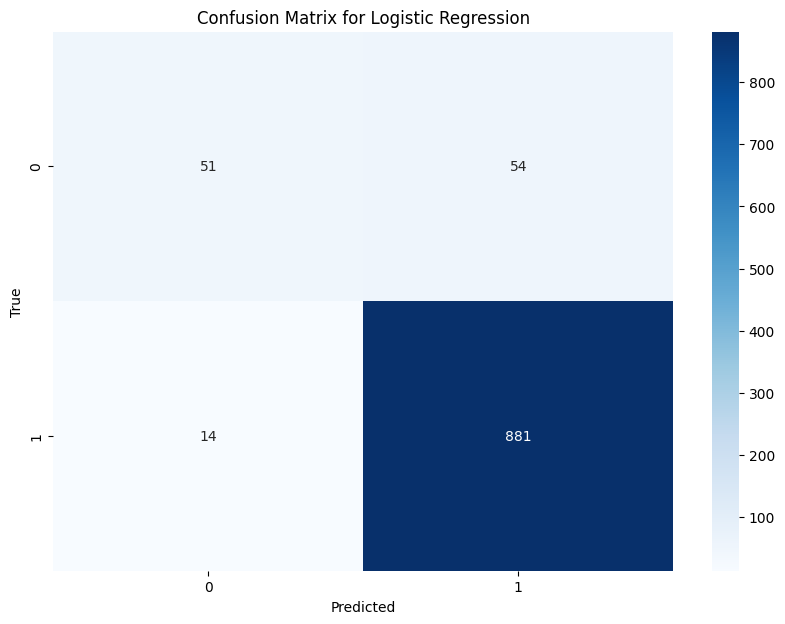


Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



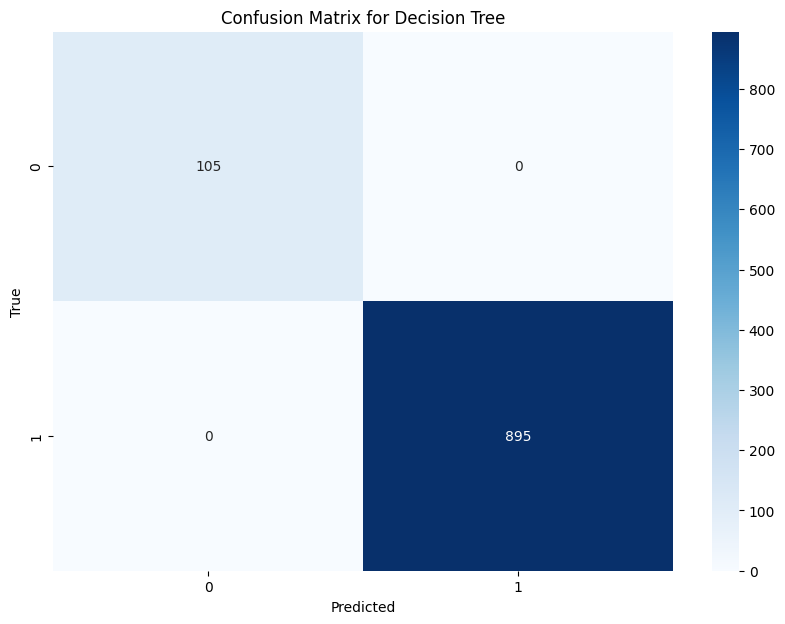


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       895

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



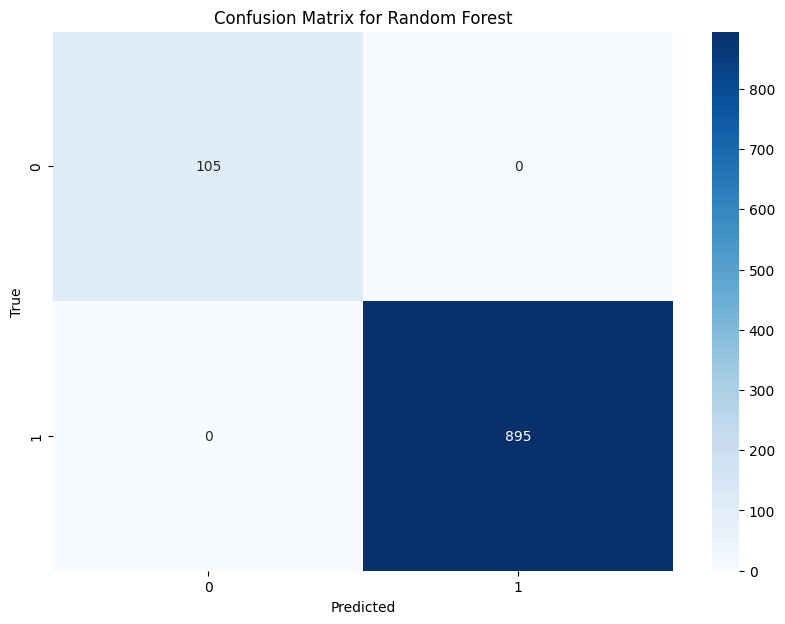


Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      0.91      0.96       105
           1       0.99      1.00      0.99       895

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000



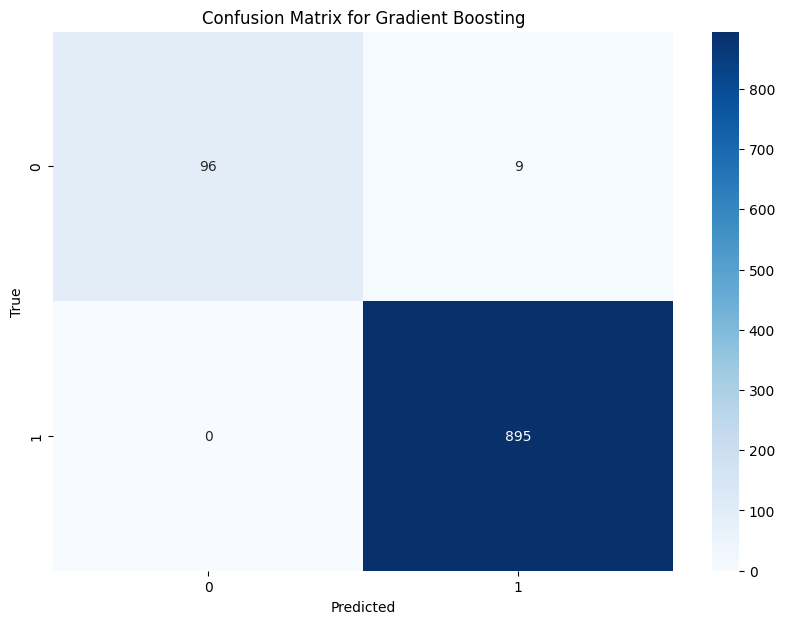


Classification Report for AdaBoost:

              precision    recall  f1-score   support

           0       0.95      0.77      0.85       105
           1       0.97      1.00      0.98       895

    accuracy                           0.97      1000
   macro avg       0.96      0.88      0.92      1000
weighted avg       0.97      0.97      0.97      1000



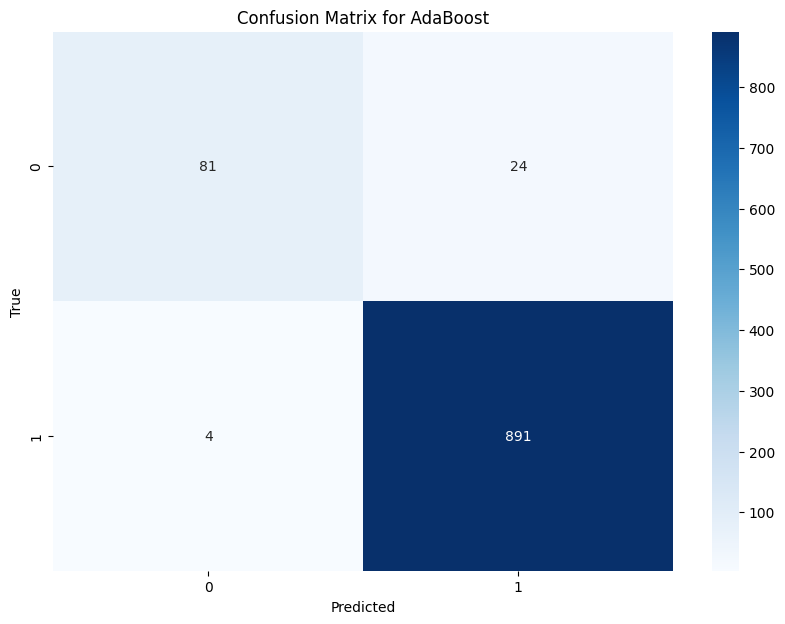


Classification Report for Naive Bayes:

              precision    recall  f1-score   support

           0       0.43      0.71      0.54       105
           1       0.96      0.89      0.93       895

    accuracy                           0.87      1000
   macro avg       0.70      0.80      0.73      1000
weighted avg       0.91      0.87      0.89      1000



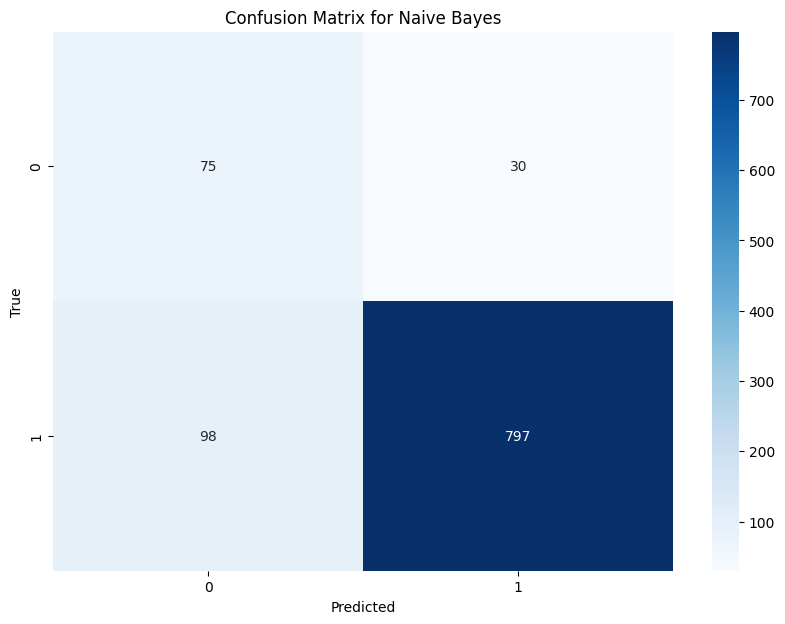


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.97      0.54      0.70       105
           1       0.95      1.00      0.97       895

    accuracy                           0.95      1000
   macro avg       0.96      0.77      0.83      1000
weighted avg       0.95      0.95      0.94      1000



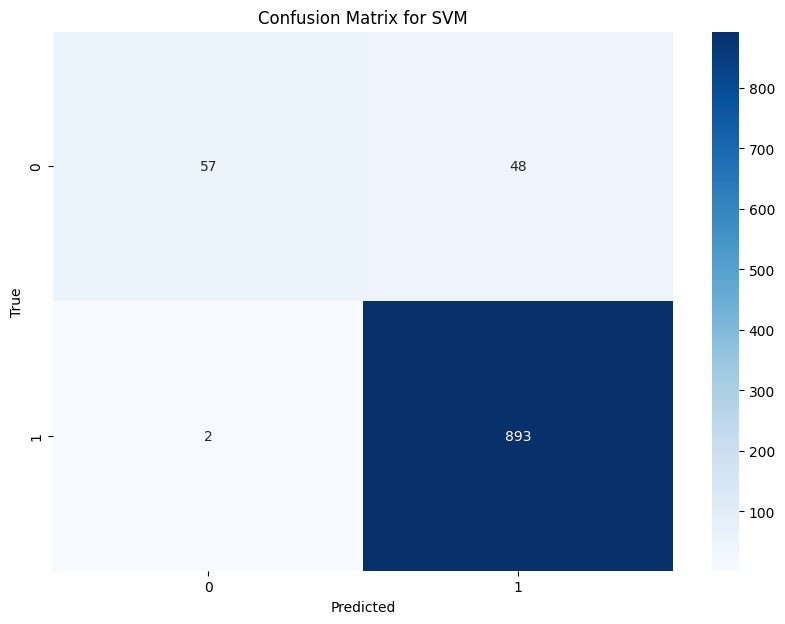


Classification Report for K-Neighbors:

              precision    recall  f1-score   support

           0       0.83      0.38      0.52       105
           1       0.93      0.99      0.96       895

    accuracy                           0.93      1000
   macro avg       0.88      0.69      0.74      1000
weighted avg       0.92      0.93      0.91      1000



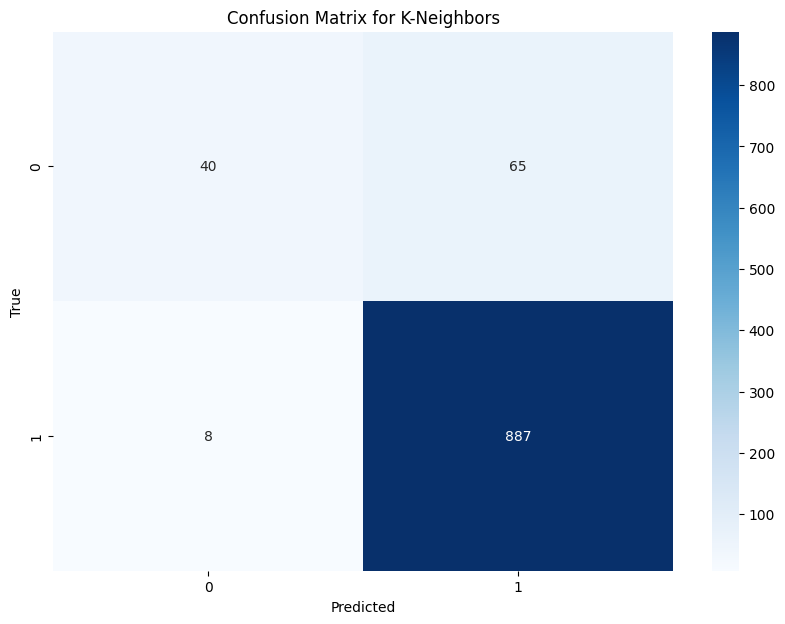

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Train each classifier, make predictions, and plot confusion matrix and classification report
for name, clf in classifiers.items():
    clf.fit(X_scaled, y)
    y_pred = clf.predict(X_scaled)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y, y_pred))
    plot_confusion_matrix(y, y_pred, f'Confusion Matrix for {name}')


Accuracy without scaling:
{'Logistic Regression': 0.924, 'Decision Tree': 0.8920000000000001, 'Random Forest': 0.929, 'Gradient Boosting': 0.933, 'AdaBoost': 0.917, 'Naive Bayes': 0.866, 'SVM': 0.9240000000000002, 'K-Neighbors': 0.891}
Accuracy with scaling:
{'Logistic Regression': 0.924, 'Decision Tree': 0.892, 'Random Forest': 0.932, 'Gradient Boosting': 0.933, 'AdaBoost': 0.917, 'Naive Bayes': 0.866, 'SVM': 0.9120000000000001, 'K-Neighbors': 0.8850000000000001}


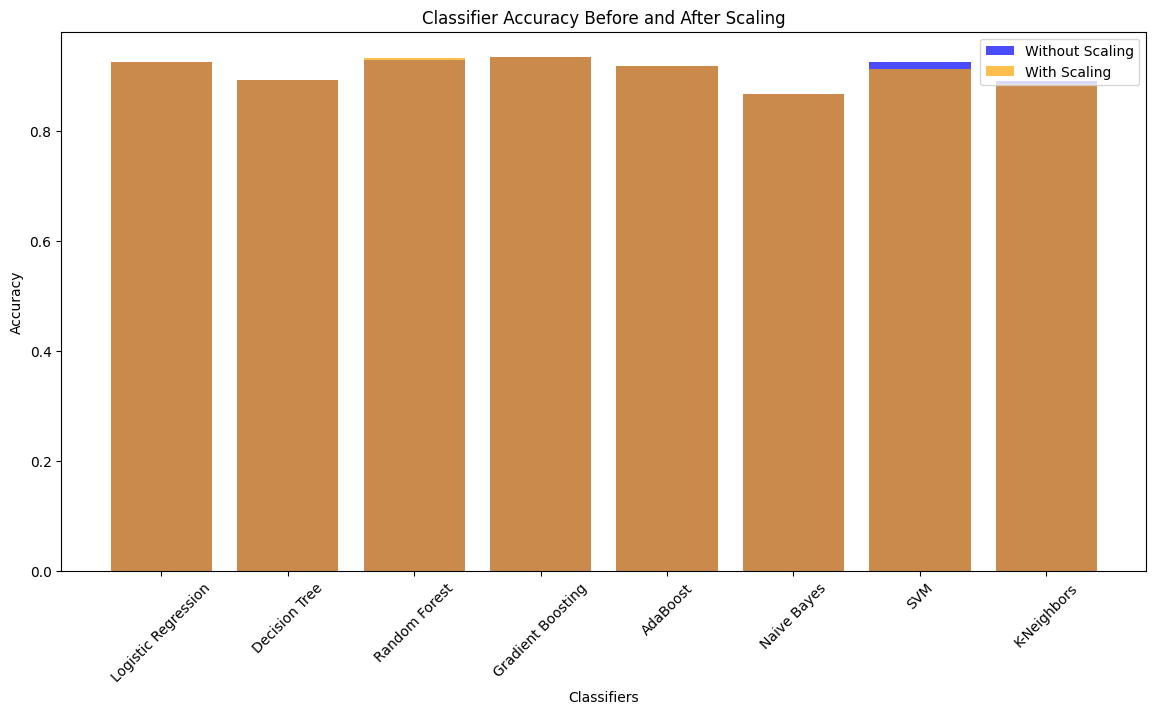

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Assume X and y are already defined
# Standard scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "K-Neighbors": KNeighborsClassifier()
}

# Perform cross-validation and collect scores
accuracy_without_scaling = {}
accuracy_with_scaling = {}

for name, clf in classifiers.items():
    scores_without_scaling = cross_val_score(clf, X, y, cv=5)
    accuracy_without_scaling[name] = scores_without_scaling.mean()

    scores_with_scaling = cross_val_score(clf, X_scaled, y, cv=5)
    accuracy_with_scaling[name] = scores_with_scaling.mean()

print("Accuracy without scaling:")
print(accuracy_without_scaling)
print("Accuracy with scaling:")
print(accuracy_with_scaling)

# Plot the graphs
plt.figure(figsize=(14, 7))
plt.bar(accuracy_without_scaling.keys(), accuracy_without_scaling.values(), color='blue', alpha=0.7, label='Without Scaling')
plt.bar(accuracy_with_scaling.keys(), accuracy_with_scaling.values(), color='orange', alpha=0.7, label='With Scaling')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Before and After Scaling')
plt.xticks(rotation=45)
plt.legend()
plt.show()


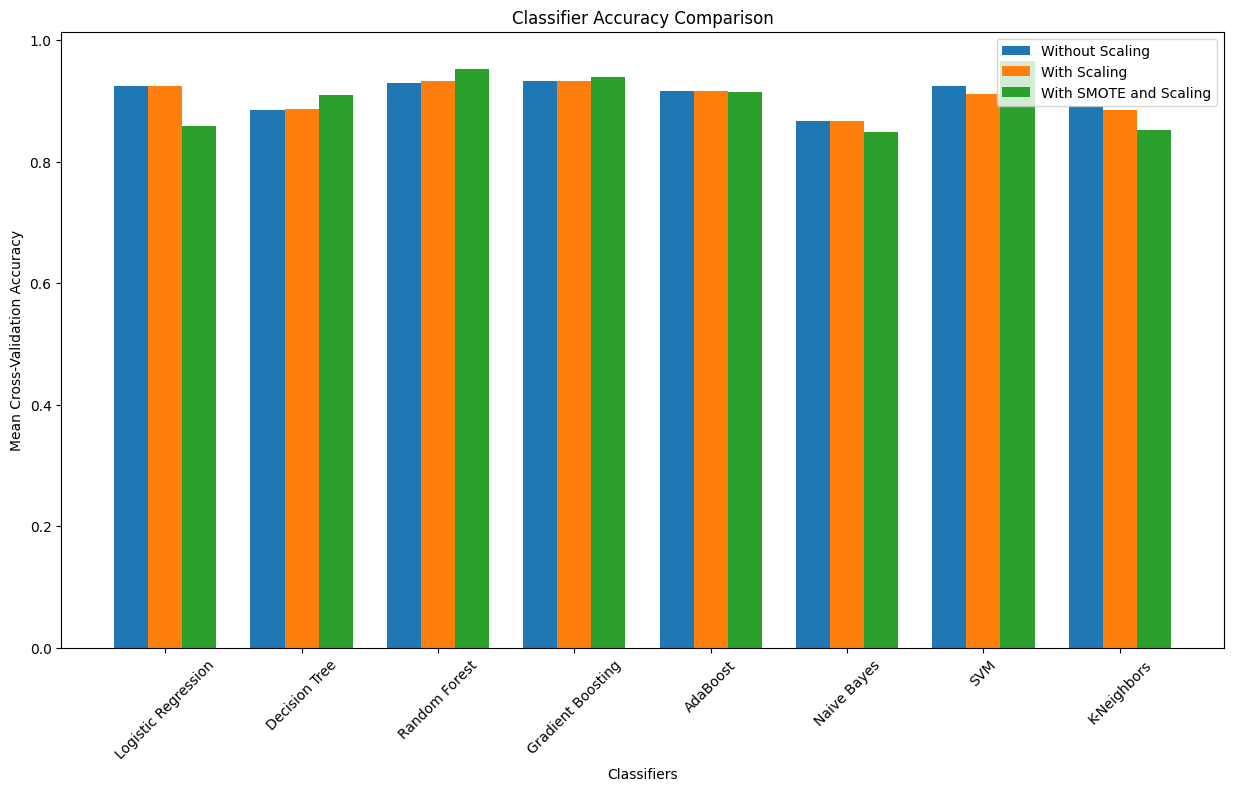

            Classifier  Without Scaling  With Scaling  With SMOTE and Scaling
0  Logistic Regression            0.924         0.924                0.859218
1        Decision Tree            0.885         0.886                0.908939
2        Random Forest            0.929         0.933                0.952514
3    Gradient Boosting            0.933         0.933                0.938547
4             AdaBoost            0.917         0.917                0.913966
5          Naive Bayes            0.866         0.866                0.849162
6                  SVM            0.924         0.912                0.965363
7          K-Neighbors            0.891         0.885                0.851397


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your data
# Assuming X and y are already defined

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "K-Neighbors": KNeighborsClassifier()
}

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standard scaling of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Perform cross-validation and collect scores without scaling
cv_scores_without_scaling = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores_without_scaling[name] = scores.mean()

# Perform cross-validation and collect scores with scaling
cv_scores_with_scaling = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=5)
    cv_scores_with_scaling[name] = scores.mean()

# Perform cross-validation and collect scores with SMOTE and scaling
cv_scores_smote = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_resampled_scaled, y_resampled, cv=5)
    cv_scores_smote[name] = scores.mean()

# Plotting the results
fig, ax = plt.subplots(figsize=(15, 8))
index = np.arange(len(classifiers))
bar_width = 0.25

bar1 = plt.bar(index, cv_scores_without_scaling.values(), bar_width, label='Without Scaling')
bar2 = plt.bar(index + bar_width, cv_scores_with_scaling.values(), bar_width, label='With Scaling')
bar3 = plt.bar(index + 2 * bar_width, cv_scores_smote.values(), bar_width, label='With SMOTE and Scaling')

plt.xlabel('Classifiers')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(index + bar_width, cv_scores_without_scaling.keys(), rotation=45)
plt.legend()
plt.show()

# Print the accuracy in a table format
accuracy_df = pd.DataFrame({
    'Classifier': cv_scores_without_scaling.keys(),
    'Without Scaling': cv_scores_without_scaling.values(),
    'With Scaling': cv_scores_with_scaling.values(),
    'With SMOTE and Scaling': cv_scores_smote.values()
})

print(accuracy_df)


In [26]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Print the test set accuracy in a table format
test_accuracy_df = pd.DataFrame({
    'Classifier': test_scores_without_scaling.keys(),
    'Without Scaling': test_scores_without_scaling.values(),
    'With Scaling': test_scores_with_scaling.values(),
    'With SMOTE and Scaling': test_scores_smote.values()
})

print(test_accuracy_df)


            Classifier  Without Scaling  With Scaling  With SMOTE and Scaling
0  Logistic Regression            0.930         0.910                   0.845
1        Decision Tree            0.875         0.900                   0.865
2        Random Forest            0.925         0.905                   0.870
3    Gradient Boosting            0.940         0.905                   0.895
4             AdaBoost            0.900         0.905                   0.860
5          Naive Bayes            0.830         0.880                   0.750
6                  SVM            0.925         0.910                   0.915
7          K-Neighbors            0.915         0.905                   0.710


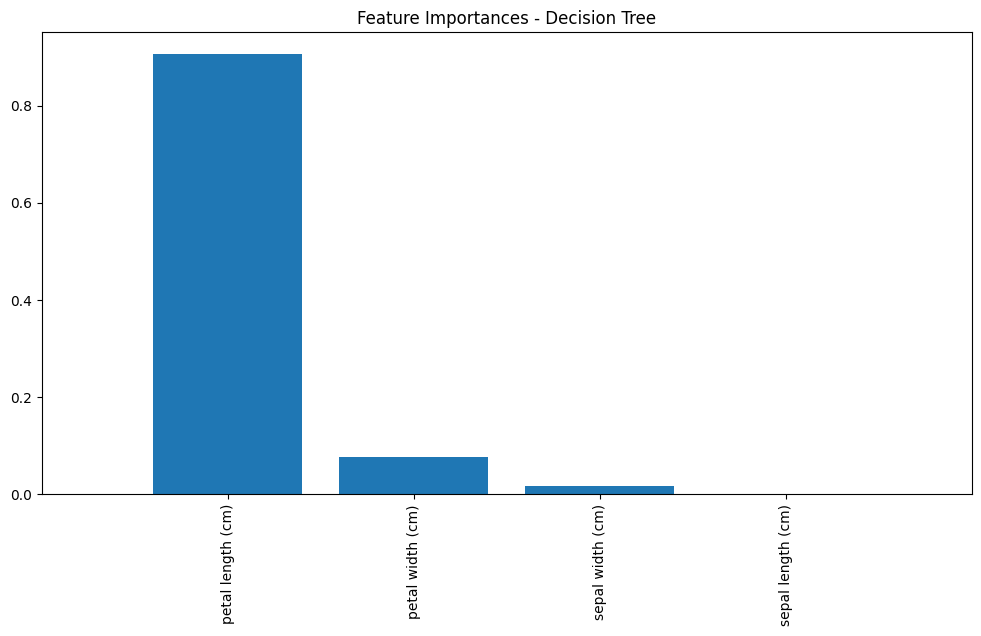

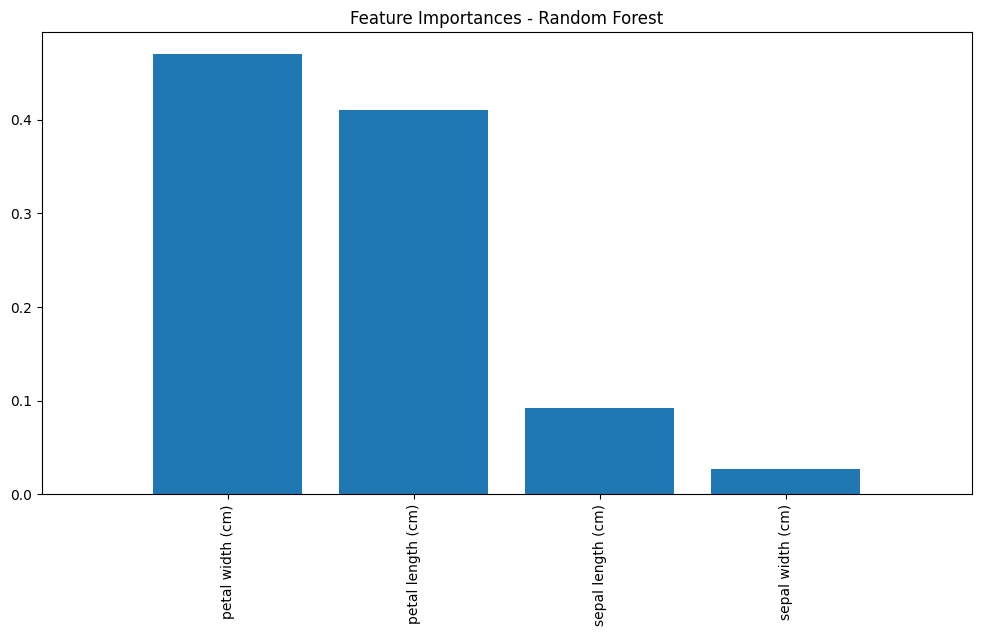

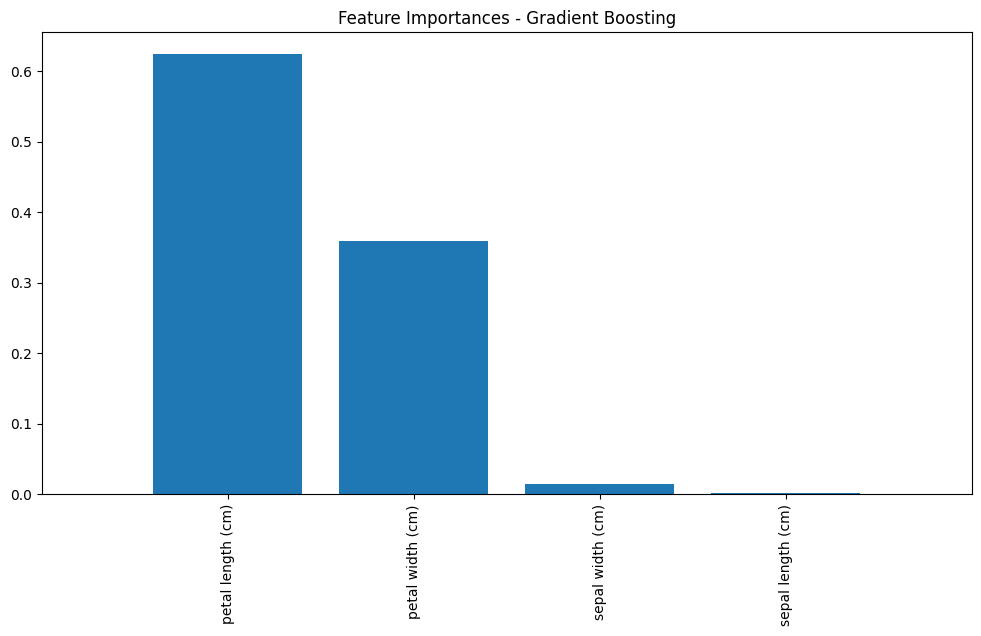

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_iris

# Example data (use your own data here)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the tree-based models
tree_based_classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store feature names
feature_names = X.columns

# Fit models and extract feature importances
feature_importances = {}

for name, clf in tree_based_classifiers.items():
    clf.fit(X_train, y_train)
    importances = clf.feature_importances_
    feature_importances[name] = importances

# Plot feature importances for each model
for name, importances in feature_importances.items():
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances - {name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()


Feature Importances Table:
             Feature  Decision Tree  Random Forest  Gradient Boosting
0  sepal length (cm)       0.000000       0.098464           0.001435
1   sepal width (cm)       0.016670       0.033579           0.014742
2  petal length (cm)       0.906143       0.439985           0.472803
3   petal width (cm)       0.077186       0.427973           0.511020


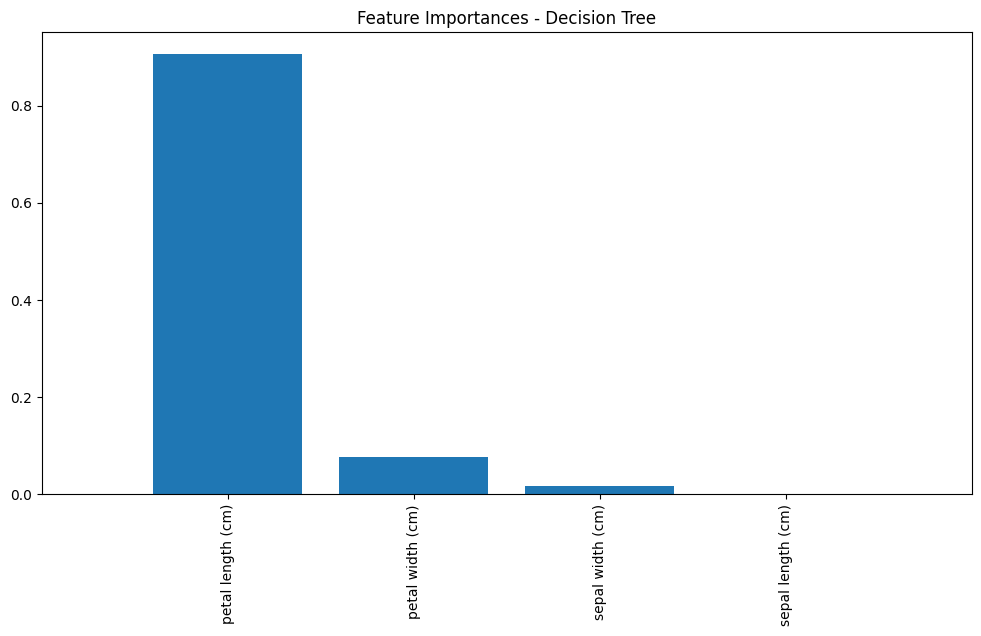

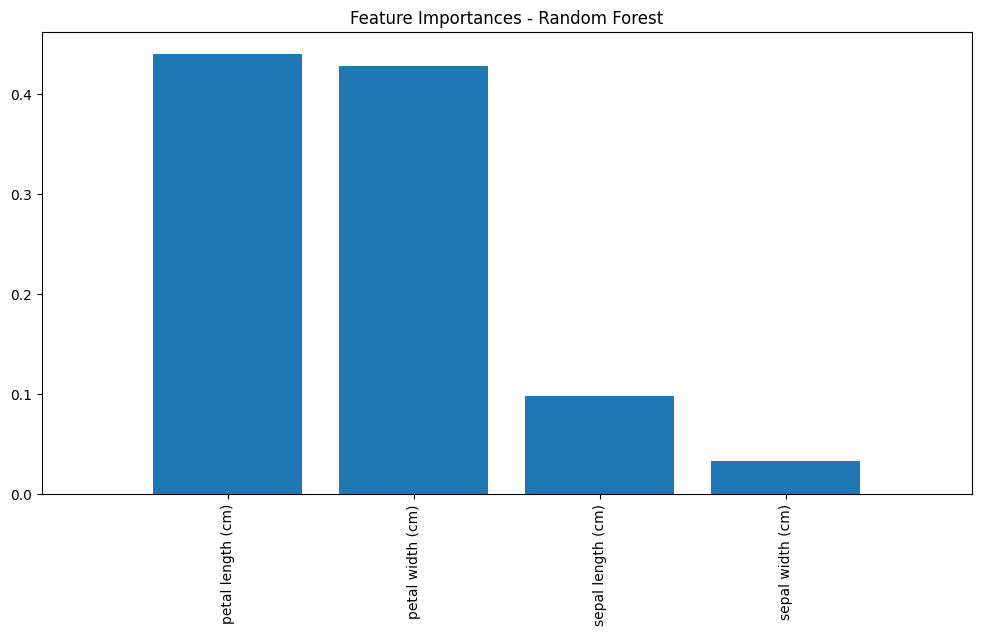

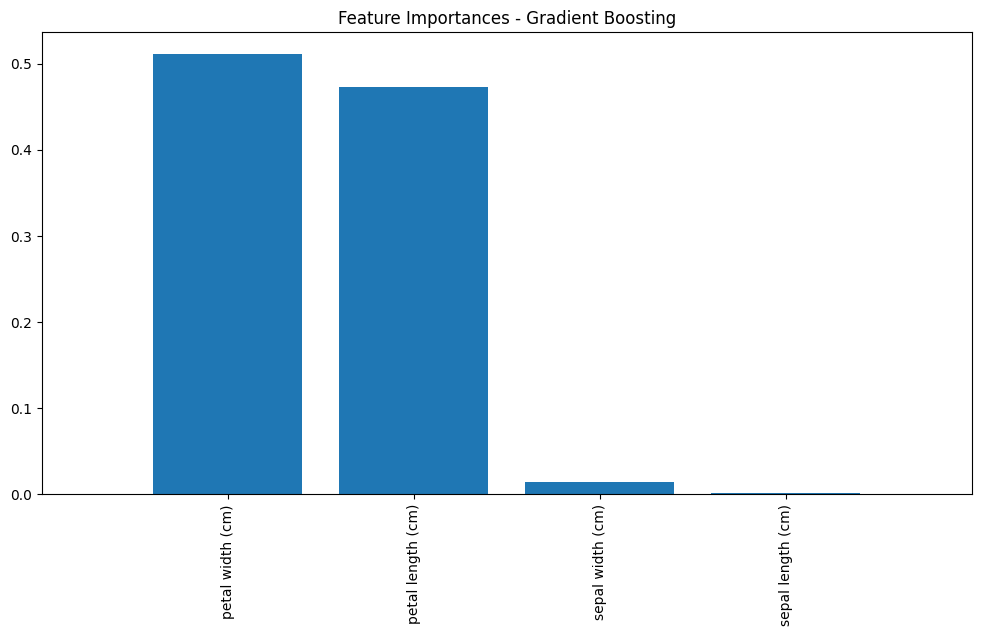

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import load_iris

# Example data (use your own data here)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the tree-based models
tree_based_classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Store feature names
feature_names = X.columns

# Fit models and extract feature importances
feature_importances = {}

for name, clf in tree_based_classifiers.items():
    clf.fit(X_train, y_train)
    importances = clf.feature_importances_
    feature_importances[name] = importances

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    "Feature": feature_names
})

# Add feature importances for each model
for name, importances in feature_importances.items():
    importance_df[name] = importances

# Display the DataFrame
print("Feature Importances Table:")
print(importance_df)

# Plot feature importances for each model
for name, importances in feature_importances.items():
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances - {name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()


In [35]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each classifier
param_grids = {
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'max_depth': [3, 5, 7]
    }
}

# Perform Grid Search for each classifier
best_params = {}
for name, clf in tree_based_classifiers.items():
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_params[name] = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params[name]}")


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set for each model
y_pred = {name: clf.predict(X_test) for name, clf in tree_based_classifiers.items()}

# Calculate and display metrics for each model
metrics = {}
for name, preds in y_pred.items():
    metrics[name] = {
        'Accuracy': accuracy_score(y_test, preds),
        'Precision': precision_score(y_test, preds, average='weighted'),
        'Recall': recall_score(y_test, preds, average='weighted'),
        'F1 Score': f1_score(y_test, preds, average='weighted'),
        'Confusion Matrix': confusion_matrix(y_test, preds)
    }

# Print the metrics
for name, scores in metrics.items():
    print(f"Model: {name}")
    print(f"Accuracy: {scores['Accuracy']:.4f}")
    print(f"Precision: {scores['Precision']:.4f}")
    print(f"Recall: {scores['Recall']:.4f}")
    print(f"F1 Score: {scores['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(scores['Confusion Matrix'])
    print()


Model: Decision Tree
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Model: Gradient Boosting
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



In [38]:
from sklearn.model_selection import cross_val_score

# Cross-Validation Scores
cv_scores = {}
for name, clf in tree_based_classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    cv_scores[name] = scores.mean()

# Print Cross-Validation Scores
for name, score in cv_scores.items():
    print(f"Model: {name} - Cross-Validation Score: {score:.4f}")


Model: Decision Tree - Cross-Validation Score: 0.9533
Model: Random Forest - Cross-Validation Score: 0.9600
Model: Gradient Boosting - Cross-Validation Score: 0.9600


In [39]:
import joblib

# Save the best model (e.g., Random Forest)
joblib.dump(tree_based_classifiers["Random Forest"], 'best_model.pkl')


['best_model.pkl']